In [1]:
import numpy as np
from lab3_tools import *
import matplotlib.pyplot as plt
from lab1_proto import *
from lab2_proto import *
from lab3_proto import *
from prondict import prondict

In [2]:
phoneHMMs = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item() 
phones = sorted(phoneHMMs.keys())
nstates = {phone: phoneHMMs[phone]['means'].shape[0] for phone in phones} 
stateList = [ph + '_' + str(id) for ph in phones for id in range(nstates[ph])] 

In [3]:
stateList 

['ah_0',
 'ah_1',
 'ah_2',
 'ao_0',
 'ao_1',
 'ao_2',
 'ay_0',
 'ay_1',
 'ay_2',
 'eh_0',
 'eh_1',
 'eh_2',
 'ey_0',
 'ey_1',
 'ey_2',
 'f_0',
 'f_1',
 'f_2',
 'ih_0',
 'ih_1',
 'ih_2',
 'iy_0',
 'iy_1',
 'iy_2',
 'k_0',
 'k_1',
 'k_2',
 'n_0',
 'n_1',
 'n_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'r_0',
 'r_1',
 'r_2',
 's_0',
 's_1',
 's_2',
 'sil_0',
 'sil_1',
 'sil_2',
 'sp_0',
 't_0',
 't_1',
 't_2',
 'th_0',
 'th_1',
 'th_2',
 'uw_0',
 'uw_1',
 'uw_2',
 'v_0',
 'v_1',
 'v_2',
 'w_0',
 'w_1',
 'w_2',
 'z_0',
 'z_1',
 'z_2']

In [4]:
stateList.index('ay_2') 

8

In [5]:
filename = 'tidigits/disc_4.1.1/tidigits/train/man/nw/z43a.wav' 
samples, samplingrate = loadAudio(filename) 
lmfcc = mfcc(samples)
len(lmfcc)

[[5.99497025e-02 3.41067065e-01 2.23010043e-01 ... 9.55040651e+00
  9.01907164e+00 5.28847305e+00]
 [2.32848001e-02 1.07362911e-01 1.91046143e-01 ... 4.69393459e+00
  5.87567982e+00 7.79004490e+00]
 [1.24803082e-01 5.20282527e-02 2.20315586e-02 ... 7.35011781e+00
  7.50885776e+00 2.40051702e+00]
 ...
 [3.81642971e+01 9.09659226e+00 2.30115178e+00 ... 6.44899712e+00
  4.84063802e+00 7.92132751e+00]
 [2.79578173e+01 3.12953981e+01 5.67999017e+00 ... 3.33189886e+00
  9.87905132e+00 1.47820344e+01]
 [1.47941352e+01 1.35828485e+01 1.66397946e+00 ... 2.67839246e+00
  7.20485609e+00 9.17361104e+00]]
[[5.99497025e-02 3.41067065e-01 2.23010043e-01 ... 9.55040651e+00
  9.01907164e+00 5.28847305e+00]
 [2.32848001e-02 1.07362911e-01 1.91046143e-01 ... 4.69393459e+00
  5.87567982e+00 7.79004490e+00]
 [1.24803082e-01 5.20282527e-02 2.20315586e-02 ... 7.35011781e+00
  7.50885776e+00 2.40051702e+00]
 ...
 [3.81642971e+01 9.09659226e+00 2.30115178e+00 ... 6.44899712e+00
  4.84063802e+00 7.92132751e+00]

178

In [6]:
wordTrans = list(path2info(filename)[2])
wordTrans 

['z', '4', '3']

In [7]:
phoneTrans = words2phones(wordTrans, prondict)
print(phoneTrans)

['sil', 'z', 'iy', 'r', 'ow', 'sp', 'f', 'ao', 'r', 'sp', 'th', 'r', 'iy', 'sp', 'sil']


In [8]:
stateTrans = [phone + '_' + str(stateid) for phone in phoneTrans for stateid in range(nstates[phone])] 

In [9]:
phoneHMMs

{'f': {'name': 'f',
  'startprob': array([1., 0., 0., 0.]),
  'transmat': array([[0.8074276, 0.1925724, 0.       , 0.       ],
         [0.       , 0.7835307, 0.2164693, 0.       ],
         [0.       , 0.       , 0.4751177, 0.5248824],
         [0.       , 0.       , 0.       , 1.       ]]),
  'means': array([[ 3.756838e+02, -1.892536e+02, -9.660455e+01,  4.465488e+01,
           2.823588e+01, -4.992766e-01,  4.529542e-02, -2.909808e+01,
           1.526023e+01, -3.026565e+01,  2.106727e+01, -3.956148e+01,
           2.572369e+01],
         [ 5.441120e+02, -1.801021e+02, -1.472212e+02, -1.085416e+01,
          -2.093026e+01, -1.813961e+01, -1.523612e+01, -5.690070e+01,
          -1.829125e+01, -4.970216e+01,  9.754507e+00, -5.453812e+01,
           1.968687e+01],
         [ 7.118344e+02,  2.438120e+02, -5.496016e+01,  8.645602e+00,
          -1.945088e+02,  3.470830e+01,  3.832467e+01, -7.212926e+00,
          -4.773862e+01, -2.433857e+01,  1.006693e+02, -2.232076e+01,
           7.65

In [10]:
example = np.load('lab3_example.npz',allow_pickle=True)['example'].item()
example.keys()

dict_keys(['filename', 'samples', 'gender', 'speaker', 'digits', 'repetition', 'lmfcc', 'wordTrans', 'phoneTrans', 'utteranceHMM', 'stateTrans', 'obsloglik', 'viterbiLoglik', 'viterbiPath', 'viterbiStateTrans'])

In [11]:
utteranceHMM = concatHMMs(phoneHMMs, phoneTrans) 
utteranceHMM['means'].shape[0]
for i in example['utteranceHMM'].keys():
    print(np.allclose(utteranceHMM[i], example['utteranceHMM'][i]))
    
print("Number of states for the concatenated HMM of the example (0f3):", utteranceHMM['means'].shape[0])

True
True
True
True
Number of states for the concatenated HMM of the example (0f3): 39


In [12]:
stateTrans[10]

'r_1'

In [13]:
obsloglik = log_multivariate_normal_density_diag(lmfcc, utteranceHMM['means'], utteranceHMM['covars'])

In [14]:
len(obsloglik)

178

In [15]:
viterbi_loglik1, viterbi_path1 = viterbi(obsloglik, np.log(utteranceHMM['startprob']), np.log(utteranceHMM['transmat']), True)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Path overlayed on log_alpha')

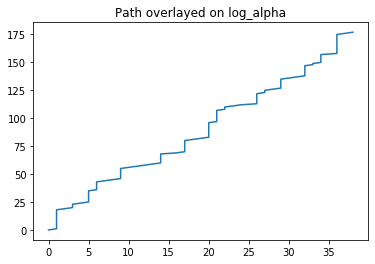

In [16]:
plt.plot(viterbi_path1, np.arange(len(viterbi_path1)))
plt.title("Path overlayed on log_alpha")

In [17]:
phone_index = []
for i in viterbi_path1:
    phone_index = phone_index + [stateTrans[int(i)]]
viterbiStateTrans = phone_index

In [18]:
viterbiStateTrans

['sil_0',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_1',
 'sil_2',
 'z_0',
 'z_0',
 'z_0',
 'z_0',
 'z_1',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'z_2',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_0',
 'iy_1',
 'iy_2',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',
 'ow_0',
 'ow_1',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'ow_2',
 'f_0',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_1',
 'f_2',
 'ao_0',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_1',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'ao_2',
 'r_0',
 'r_0',
 'r_0',
 'r_1',
 'r_2',
 'th_0',


In [19]:
frames2trans(viterbiStateTrans, outfilename='z43a.lab') 

'0 0.01 sil_0\n0.01 0.19000000000000003 sil_1\n0.19000000000000003 0.20000000000000004 sil_2\n0.20000000000000004 0.24000000000000007 z_0\n0.24000000000000007 0.25000000000000006 z_1\n0.25000000000000006 0.36000000000000015 z_2\n0.36000000000000015 0.4400000000000002 iy_0\n0.4400000000000002 0.45000000000000023 iy_1\n0.45000000000000023 0.46000000000000024 iy_2\n0.46000000000000024 0.5600000000000003 r_0\n0.5600000000000003 0.5700000000000003 r_1\n0.5700000000000003 0.5800000000000003 r_2\n0.5800000000000003 0.5900000000000003 ow_0\n0.5900000000000003 0.6000000000000003 ow_1\n0.6000000000000003 0.6900000000000004 ow_2\n0.6900000000000004 0.7000000000000004 f_0\n0.7000000000000004 0.8100000000000005 f_1\n0.8100000000000005 0.8200000000000005 f_2\n0.8200000000000005 0.8300000000000005 ao_0\n0.8300000000000005 0.9700000000000006 ao_1\n0.9700000000000006 1.0800000000000007 ao_2\n1.0800000000000007 1.1100000000000008 r_0\n1.1100000000000008 1.1200000000000008 r_1\n1.1200000000000008 1.13000